In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

In [2]:
# Loading + training,validation test split
cars0 = glob.glob('./vehicles/GTI_Far/*.png')
cars1 = glob.glob('./vehicles/GTI_MiddleClose/*.png')
cars2 = glob.glob('./vehicles/GTI_Left/*.png')
cars3 = glob.glob('./vehicles/GTI_Right/*.png')
cars4 = glob.glob('./vehicles/KITTI_extracted/*.png')
notcars1 = glob.glob('./non-vehicles/*/*.png')

# split off the last 10 percent as a test set
frac = 0.9
l0,l1,l2,l3,l4,l5=len(cars0),len(cars1),len(cars2),len(cars3),len(cars4),len(notcars1)
L = (frac*np.array([l0,l1,l2,l3,l4,l5])).astype('int')

cars = cars0[:L[0]] + cars1[:L[1]] + cars2[:L[2]] + cars3[:L[3]] + cars4[:L[4]]
notcars = notcars1[:L[5]]

cars_test = cars0[L[0]:] + cars1[L[1]:] + cars2[L[2]:] + cars3[L[3]:] + cars4[L[4]:]
notcars_test = notcars1[L[5]:]

In [3]:
print('Number of samples in cars training + validation set: ', len(cars))
print('Number of samples in notcars training + validation set: ', len(notcars))
print('Number of samples in cars test set: ',len(cars_test))
print('Number of samples in notcars test set: ',len(notcars_test))


Number of samples in cars training + validation set:  7911
Number of samples in notcars training + validation set:  8699
Number of samples in cars test set:  881
Number of samples in notcars test set:  967


**Conclusion: The two classes are more or less balanced.**

In [4]:
# Save the data for easy access
pickle_file = 'data.p'
print('Saving data to pickle file...')
try:
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'cars': cars,
                'notcars': notcars,
                'cars_test': cars_test,
                'notcars_test': notcars_test
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


In [5]:
data_file = 'data.p'
with open(data_file, mode='rb') as f:
    data = pickle.load(f)
cars = data['cars']
notcars = data['notcars']
cars_test = data['cars_test']
notcars_test = data['notcars_test']

In [27]:
i=22
a_car = plt.imread(cars[i])
not_a_car = plt.imread(notcars[i])
cars[i],notcars[i]

('./vehicles/GTI_Far/image0166.png', './non-vehicles/Extras/extra4802.png')

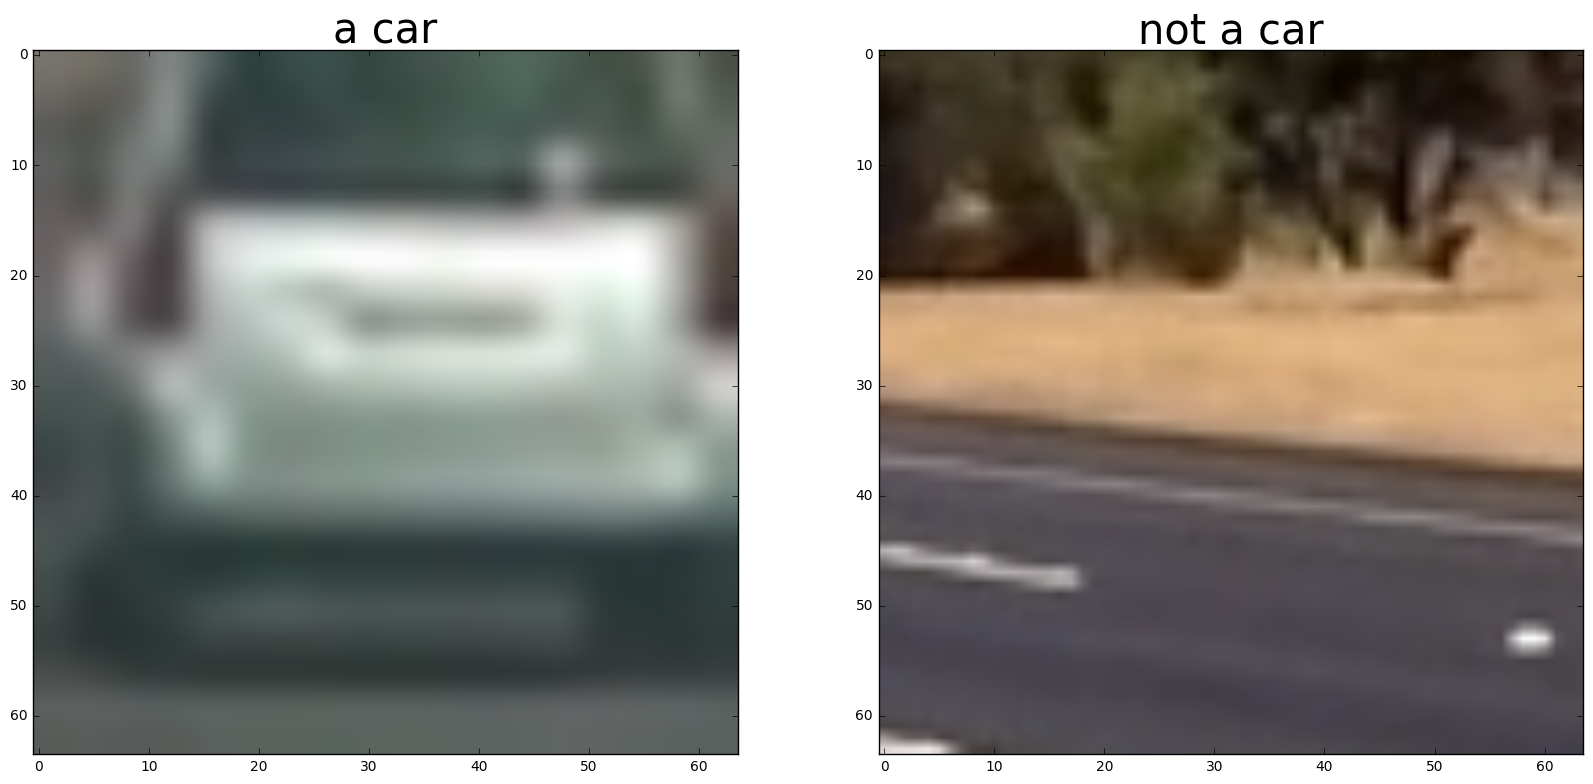

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(a_car)
ax1.set_title('a car', fontsize=30)
ax2.imshow(not_a_car)
ax2.set_title('not a car', fontsize=30)
plt.show()

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(a_car)
ax1.set_title('a car', fontsize=30)
ax2.imshow(not_a_car)
ax2.set_title('not a car', fontsize=30)
plt.savefig('car_notcar.png')